## Business Case: Apollo Hospitals - Hypothesis Testing

Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.

The ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.Which variables are significant in predicting the reason for hospitalization for different regions.How well some variables like viral load, smoking, Severity Level describe the hospitalization charges.

**Column Profiling**

- **Age:** This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- **Sex:** This is the policy holder's gender, either male or female
- **Viral Load:** Viral load refers to the amount of virus in an infected person's blood
- **Severity Level:** This is an integer indicating how severe the patient is
- **Smoker:** This is yes or no depending on whether the insured regularly smokes tobacco.
- **Region:** This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest
- **Hospitalization charges:** Individual medical costs billed to health insurance



In [4]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import combinations

In [5]:
# Loading data
apollo_data = pd.read_csv('scaler_apollo_hospitals.csv')

In [6]:
apollo_data

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...,...
1333,1333,50,male,no,northwest,10.32,3,26501
1334,1334,18,female,no,northeast,10.64,0,5515
1335,1335,18,female,no,southeast,12.28,0,4075
1336,1336,21,female,no,southwest,8.60,0,5020


In [7]:
# Checking data type of each variable and null values
apollo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


- There are no null values.
- unnamed: 0 column we can drop since it is just serial number.
- sex, smoker, region, severity level are categorical features. we need to convert them to categorical.
- age is integer data type this also we can convert to categorical depending on there age group.
- viral load is continuous variable so float dtype.
- hospitalization charges is the dependent feature we should check what are the main features that effect the hospitalization charges.

In [8]:
apollo_data.describe(include='all')

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338,1338,1338,1338.000000,1338.000000,1338.000000
unique,NaN,NaN,2,2,4,NaN,NaN,NaN
top,NaN,NaN,male,no,southeast,NaN,NaN,NaN
freq,NaN,NaN,676,1064,364,NaN,NaN,NaN
mean,668.500000,39.207025,NaN,NaN,NaN,10.221233,1.094918,33176.058296
std,386.391641,14.049960,NaN,NaN,NaN,2.032796,1.205493,30275.029296
min,0.000000,18.000000,NaN,NaN,NaN,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,NaN,NaN,NaN,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,NaN,NaN,NaN,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,NaN,NaN,NaN,11.567500,2.000000,41599.500000


In [9]:
# Creating a copy of actual data
clean_data=apollo_data.copy()

In [10]:
# Droping the serial number column (unnamed: 0)
clean_data.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
# Converting categorical variables dtype object to categorical
clean_data['sex']= pd.Categorical(clean_data['sex'])
clean_data['smoker'] = pd.Categorical(clean_data['smoker'])
clean_data['region'] = pd.Categorical(clean_data['region'])
clean_data['severity level'] = pd.Categorical(clean_data['severity level'])

In [12]:
# Dividing age to age groups categorical 
# 17-25 : Young Adult
# 26-38 : Adult
# 39-50 : Middle Age Adult
# 51-65 : Old Age Adult
clean_data['age']= pd.cut(apollo_data['age'],bins=[17,25,38,50,65],
                          labels=['Young_Adult','Adult','middle_age_adult','old_age_adult'])

In [13]:
# shape of data
clean_data.shape

(1338, 7)

There are 7 features and 1338 entries of patients details.

### **Univariate Analysis**

<AxesSubplot:xlabel='severity level', ylabel='count'>

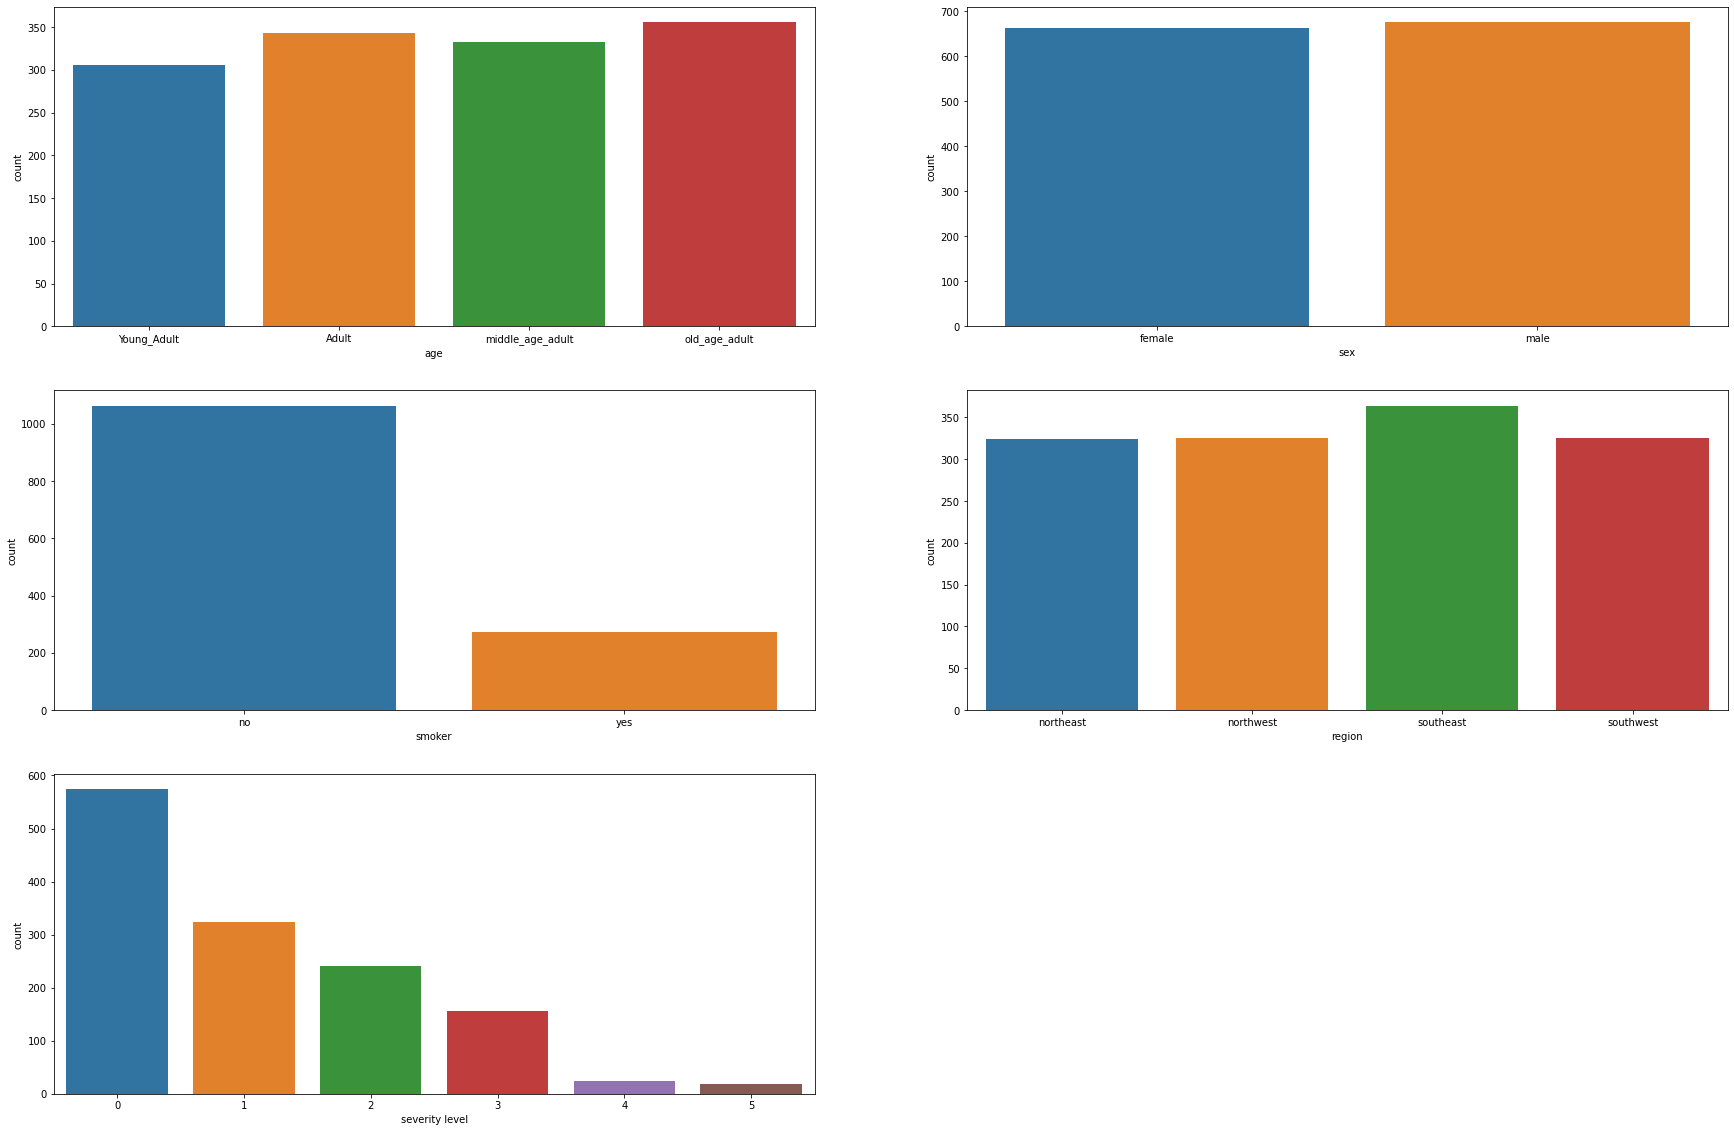

In [14]:
plt.figure(figsize=(30,20))
plt.subplot(3,2,1)
sns.countplot(data=clean_data, x='age')
plt.subplot(3,2,2)
sns.countplot(data=clean_data,x='sex')
plt.subplot(3,2,3)
sns.countplot(data=clean_data, x='smoker')
plt.subplot(3,2,4)
sns.countplot(data=clean_data, x='region')
plt.subplot(3,2,5)
sns.countplot(data=clean_data, x='severity level')

- There are equal ratio of Age groups, sex, region. There are less number of smokers than non smokers. Severity level number of patients are decreasing as the severity increasing.

array([[<AxesSubplot:title={'center':'viral load'}>,
        <AxesSubplot:title={'center':'hospitalization charges'}>]],
      dtype=object)

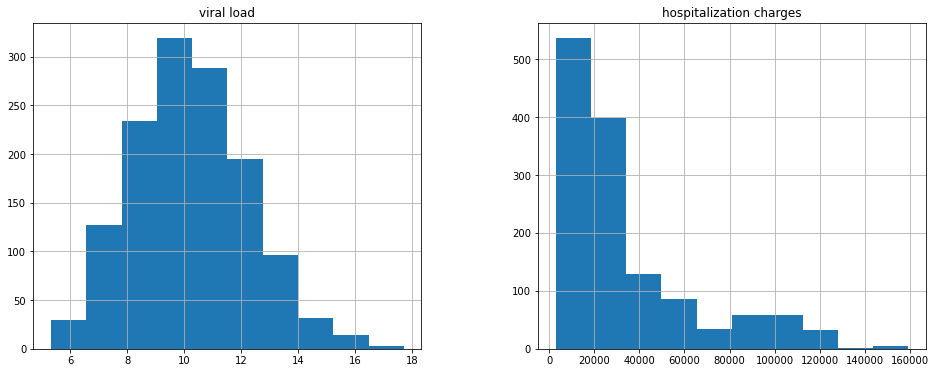

In [15]:
#distributions of continuous variables
clean_data.hist(figsize=(16,6))

- viral load is normally distributed where as hospitalization charges are right skewed.

<AxesSubplot:xlabel='age', ylabel='count'>

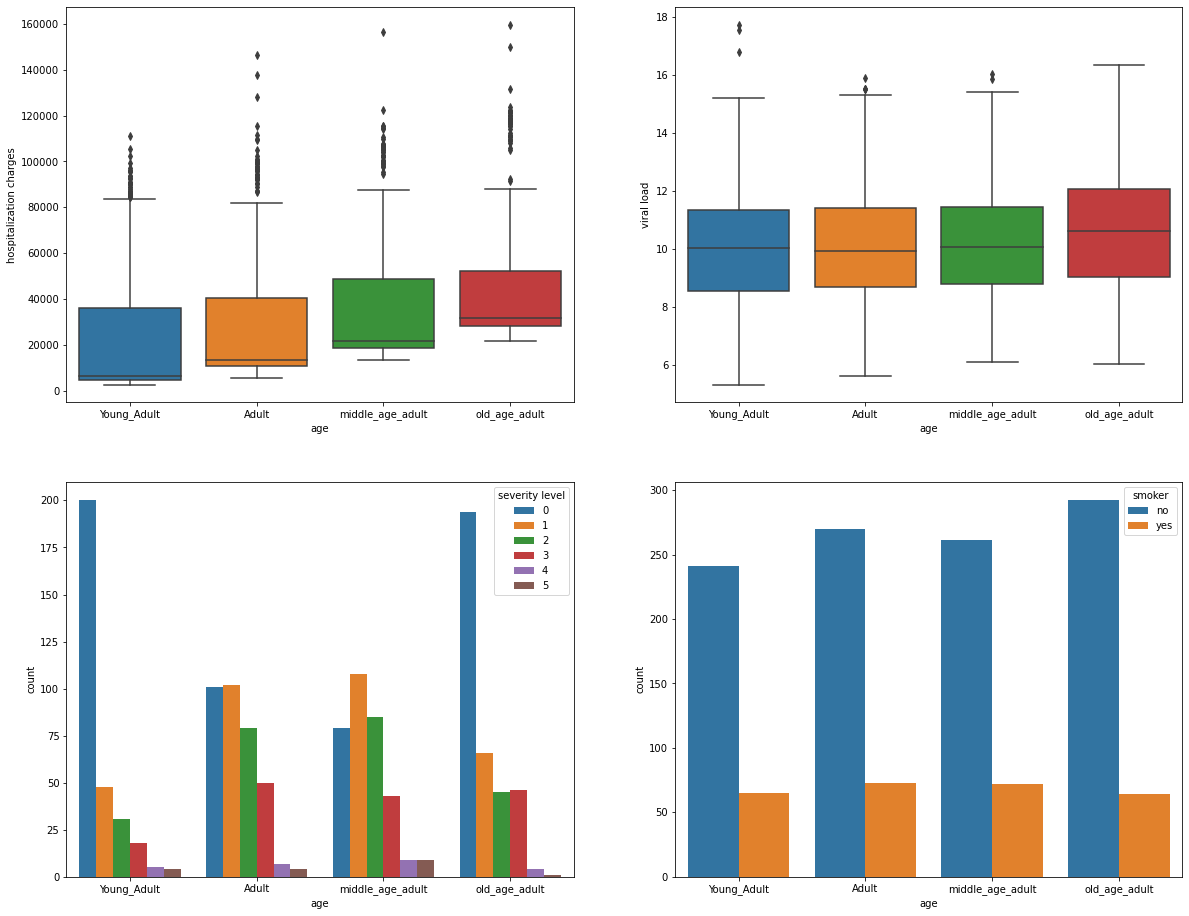

In [16]:
# How Age is related to other features
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
sns.boxplot(data=clean_data, x='age', y='hospitalization charges')
plt.subplot(2,2,2)
sns.boxplot(data=clean_data, x='age', y='viral load')
plt.subplot(2,2,3)
sns.countplot(data=clean_data,x='age',hue='severity level')
plt.subplot(2,2,4)
sns.countplot(data=clean_data,x='age',hue='smoker')

- Hospitalization charges is increasing for older patients.
- viral load is somewhat high for old age people compared to others.
- For Adults and middle age adults the severity level with 0 people is low compared to other age groups and the other severity levels are high compared to other age groups.
- Smokers percent is some less in old age adults.


<AxesSubplot:xlabel='age'>

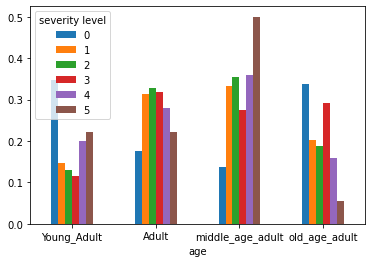

In [17]:
# Fraction of each severity level divided with respect to age
pd.crosstab(clean_data['age'],clean_data['severity level'],normalize='columns').plot.bar(rot=0)

<AxesSubplot:xlabel='age', ylabel='count'>

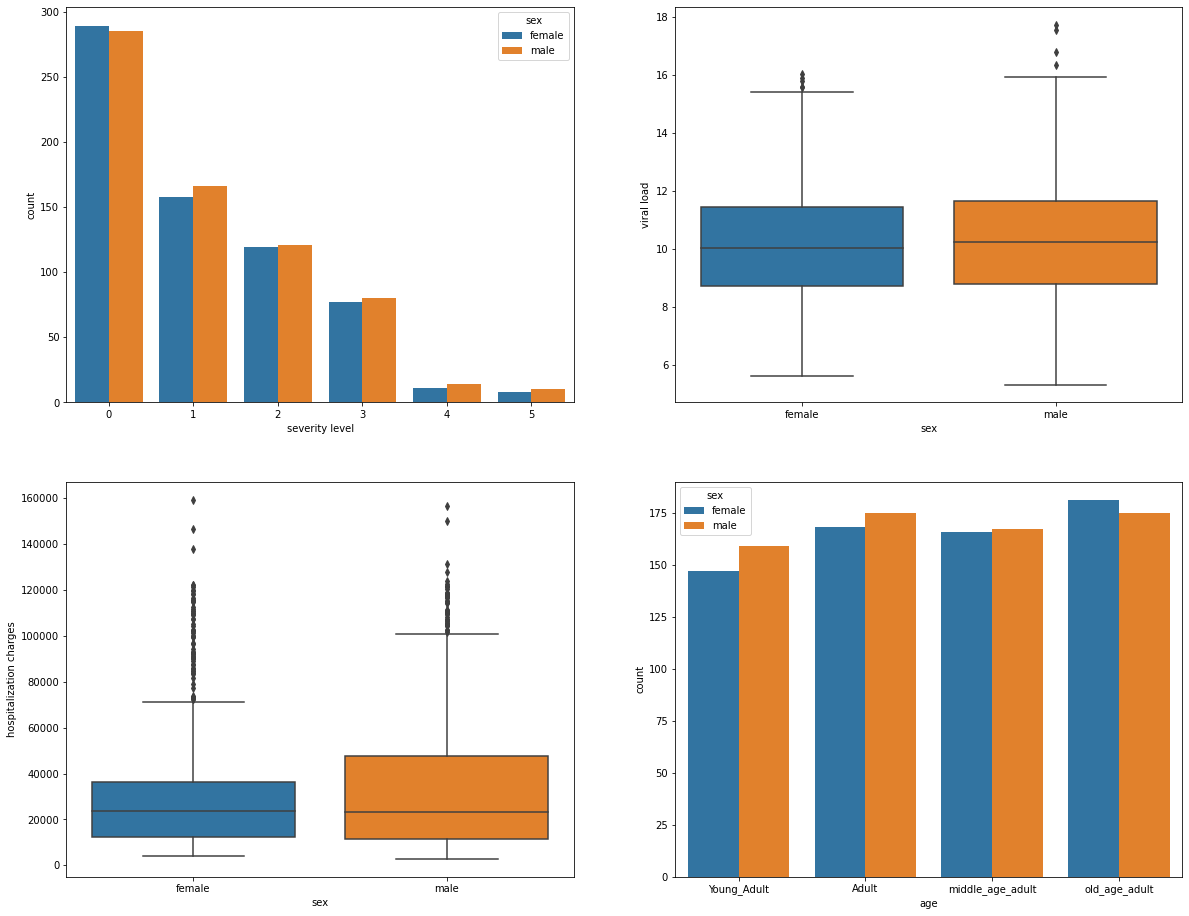

In [18]:
# How sex feature is related to other features
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
sns.countplot(data=clean_data,x='severity level',hue='sex')
plt.subplot(2,2,2)
sns.boxplot(data=clean_data,x='sex',y='viral load')
plt.subplot(2,2,3)
sns.boxplot(data=clean_data,x='sex',y='hospitalization charges')
plt.subplot(2,2,4)
sns.countplot(data=clean_data,x='age',hue='sex')

- Not much difference in males and females in other features.

<AxesSubplot:xlabel='viral load', ylabel='hospitalization charges'>

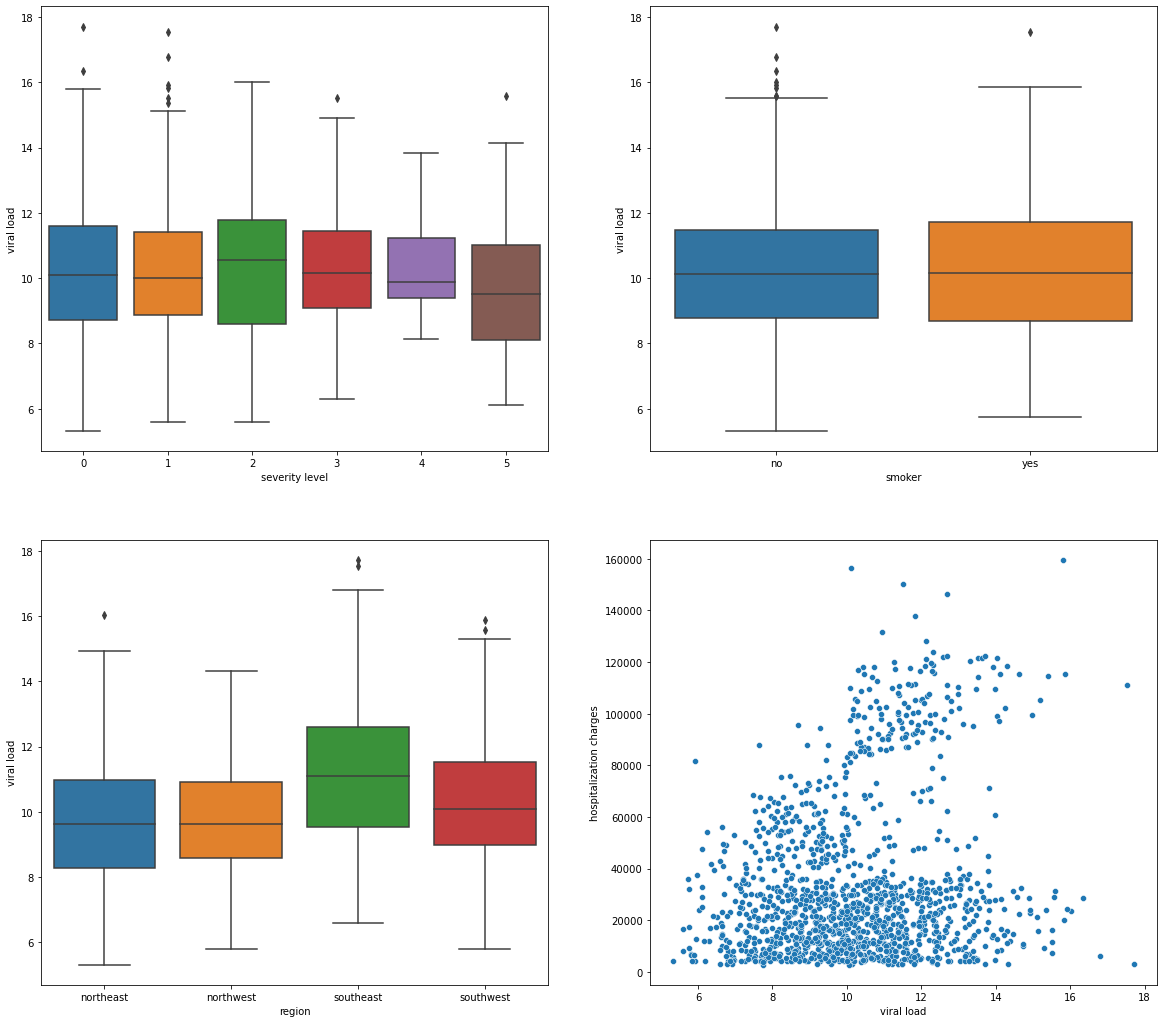

In [19]:
# How Viral load is related to other features
plt.figure(figsize=(20,18))
plt.subplot(2,2,1)
sns.boxplot(data=clean_data,x='severity level',y='viral load')
plt.subplot(2,2,2)
sns.boxplot(data=clean_data,x='smoker',y='viral load')
plt.subplot(2,2,3)
sns.boxplot(data=clean_data,x='region',y='viral load')
plt.subplot(2,2,4)
sns.scatterplot(data=clean_data,x='viral load',y='hospitalization charges')

- viral load is high in southeast compared to other region.
- As viral load increasing the hospitalization charges are increasing for some patients it may be due to one of the feature.

<AxesSubplot:xlabel='smoker'>

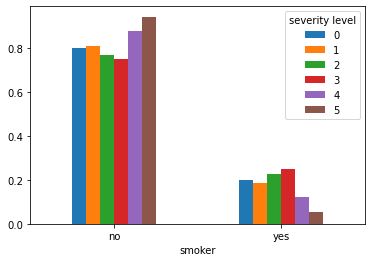

In [20]:
# Proportion of people with each severity level with respect to smoker
pd.crosstab(clean_data['smoker'],clean_data['severity level'],normalize='columns').plot.bar(rot=0)

<AxesSubplot:xlabel='severity level', ylabel='hospitalization charges'>

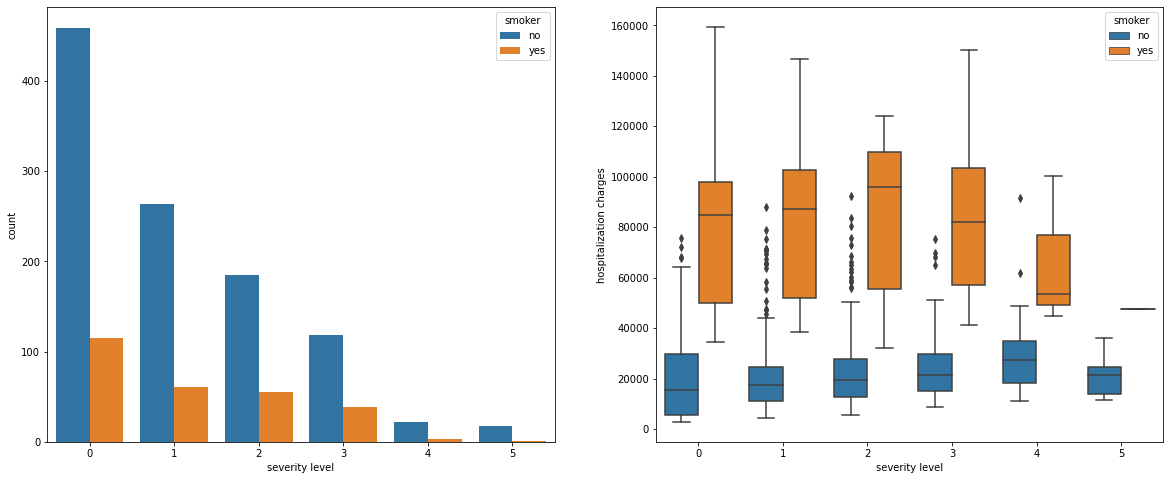

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=clean_data,x='severity level',hue='smoker')
plt.subplot(1,2,2)
sns.boxplot(data=clean_data,x='severity level',y='hospitalization charges',hue='smoker')

<AxesSubplot:xlabel='region'>

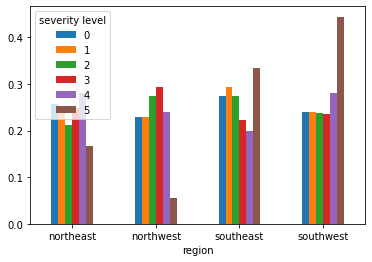

In [22]:
#sns.countplot(data=clean_data,x='severity level',hue='region')
pd.crosstab(clean_data['region'],clean_data['severity level'],normalize='columns').plot.bar(rot=0)

- Almost half of severity level 5 cases came from southwest

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

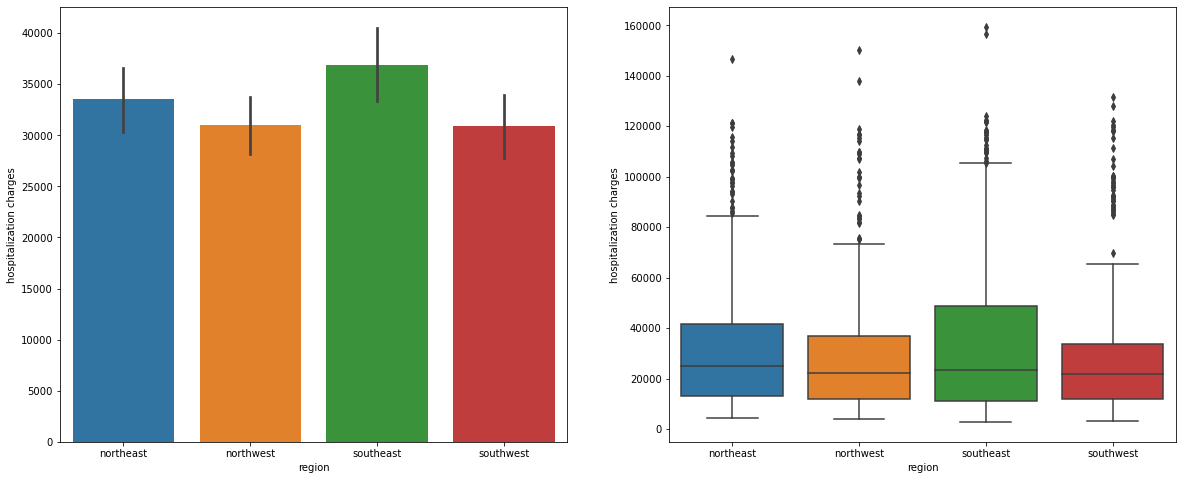

In [23]:
# Region vs Hospitalization charges
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot(data=clean_data,x='region',y='hospitalization charges')
plt.subplot(1,2,2)
sns.boxplot(data=clean_data,x='region',y='hospitalization charges')

- Southeast region hospitalization charges are somewhat higher compared to other regions.

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

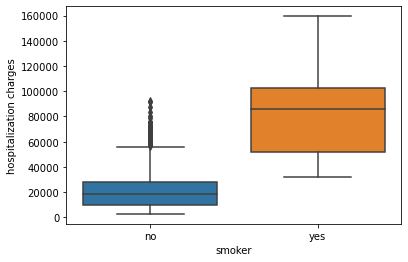

In [24]:
# Smoker vs non-smoker hospitalization charges
sns.boxplot(data=clean_data,x='smoker',y='hospitalization charges')

<AxesSubplot:xlabel='viral load', ylabel='hospitalization charges'>

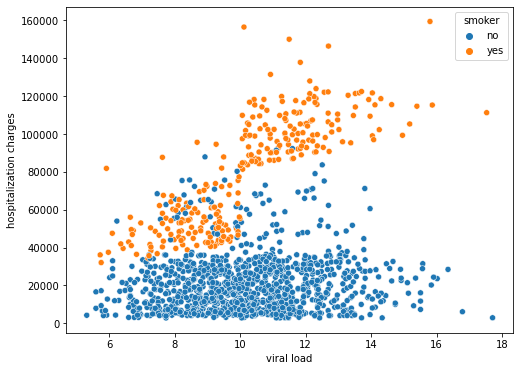

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=clean_data,x='viral load',y='hospitalization charges',hue='smoker')

- It is clear that the hospitalization charges of smoker is higher than non-smoker with higher viral load.

<AxesSubplot:xlabel='sex', ylabel='viral load'>

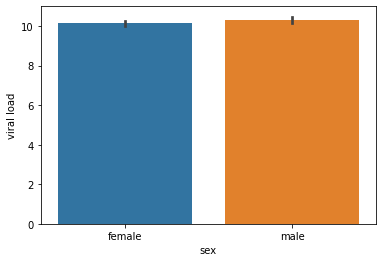

In [26]:
# Barplot of viral load with respect to sex feature.
sns.barplot(data=clean_data,x='sex',y='viral load')

<AxesSubplot:>

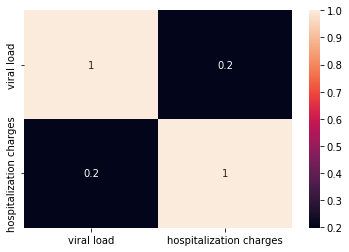

In [27]:
# Heatmap of total data
sns.heatmap(clean_data.corr(),annot=True)

<AxesSubplot:>

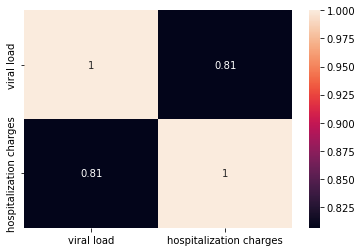

In [28]:
# Heatmap of only smokers data
sns.heatmap(clean_data[clean_data['smoker']=='yes'].corr(),annot=True)

- **It is clear that the smokers hospitalization charges are dependent on viral load**

### Outliers

**There are no outliers with respect to age(17-65), viral load(0-18), and hospitalization charges(Not much differ from other).**

### HYPOTHESIS TESTING

**A.T-Test Right tailed (Hospitalization of people who do smoking is greater than those who don't)**

**1.Visual Analysis:**

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

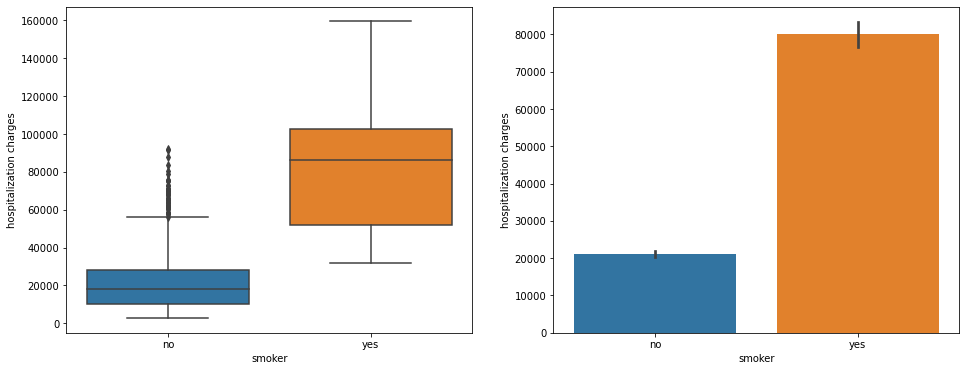

In [29]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(data=clean_data,x='smoker',y='hospitalization charges')
plt.subplot(1,2,2)
sns.barplot(data=clean_data,x='smoker',y='hospitalization charges')

**2.Hypothesis formulation:**

H0: Means of hospitalization charges are equal for smoker's and non-smoker's
H1: Means of hospitalization charges are greater for smoker's than non-smoker's

**3.Checking Test Assumptions:**

checking sample means follow normal distribution

In [30]:
clean_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [31]:
#Taking random sample means
non_smoker=[]
smoker=[]
for i in range(1000) :
    mean_ns= np.mean(apollo_data[apollo_data['smoker']=='no']['hospitalization charges'].sample(500,replace=True))
    mean_s= np.mean(apollo_data[apollo_data['smoker']=='yes']['hospitalization charges'].sample(100,replace=True))
    non_smoker.append(mean_ns)
    smoker.append(mean_s)


<AxesSubplot:ylabel='Count'>

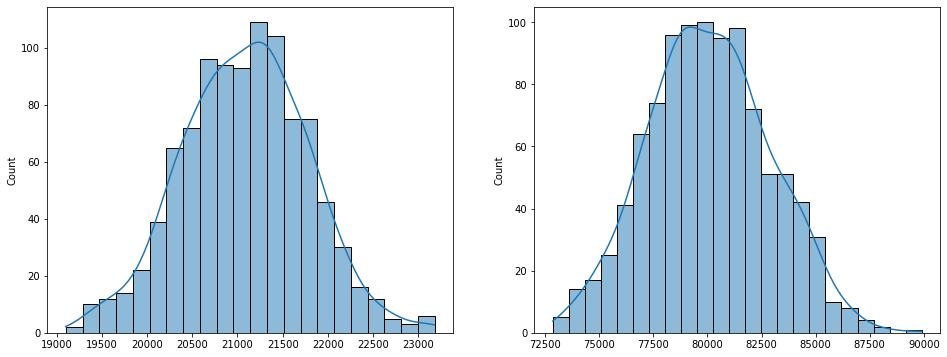

In [32]:
# Distribution of sample means 
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(data=non_smoker,kde=True)
plt.subplot(1,2,2)
sns.histplot(data=smoker,kde=True)

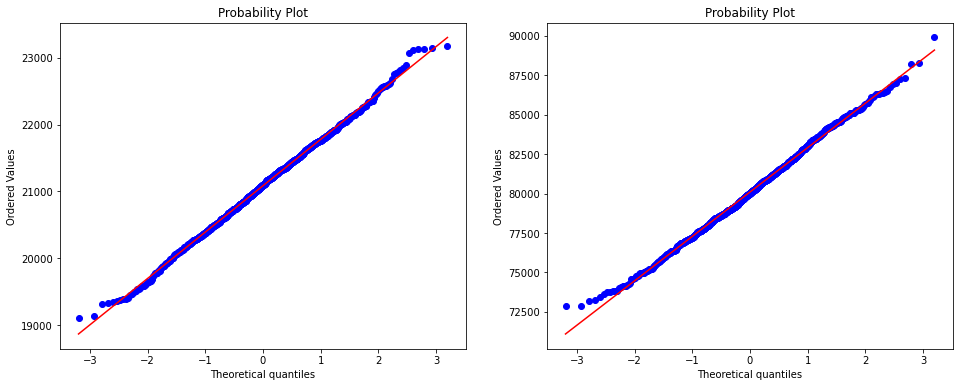

In [33]:
# Checking normality by QQ-plot of sample means.
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
stats.probplot(non_smoker,plot=plt)
plt.subplot(1,2,2)
stats.probplot(smoker,plot=plt)
plt.show()

- **Almost points are on the line, So they follow Normal Distribution**

In [34]:
# Checking Normal distribution by Shapiro test
print('Non smoker: ',stats.shapiro(non_smoker),'\n',
       'Smoker: ',stats.shapiro(smoker))

Non smoker:  ShapiroResult(statistic=0.9983212947845459, pvalue=0.44379955530166626) 
 Smoker:  ShapiroResult(statistic=0.9973652362823486, pvalue=0.10426120460033417)


- **P value is greater than 0.05 so we should accept null hypothesis i.e, distribution is normal.**

In [35]:
# Homogeneity of variance by levene test
stats.levene(apollo_data[apollo_data['smoker']=='no']['hospitalization charges'],
             apollo_data[apollo_data['smoker']=='yes']['hospitalization charges'])

LeveneResult(statistic=332.6132009308764, pvalue=1.5595259401311176e-66)

- **P value is very less so we should reject null hypothesis i.e, Variance is not equal.**

**4.P-Value:**

In [36]:
# Applying T-test independent with equal_variance as False
stats.ttest_ind(apollo_data[apollo_data['smoker']=='no']['hospitalization charges'],
                apollo_data[apollo_data['smoker']=='yes']['hospitalization charges'],equal_var=False)

Ttest_indResult(statistic=-32.751856578287196, pvalue=5.890945350773759e-103)

- **Since we are looking for greater (Right tail) the p-value should be halved.**

- **P-value= 5.8909e-103/2 = 2.9509e-103**

**5.Conclusion based on P-Value:**

- **P-value is very small so we should reject null hypothesis that the mean of hospitalization charges of smokers and non smokers are equal.**
- **So it is clear that the smokers hospitalization charges are greater than non smokers.**

**B. T-test Two tailed: viral load of females is different from that of males**

**1.Visual Analysis:**

<AxesSubplot:xlabel='sex', ylabel='viral load'>

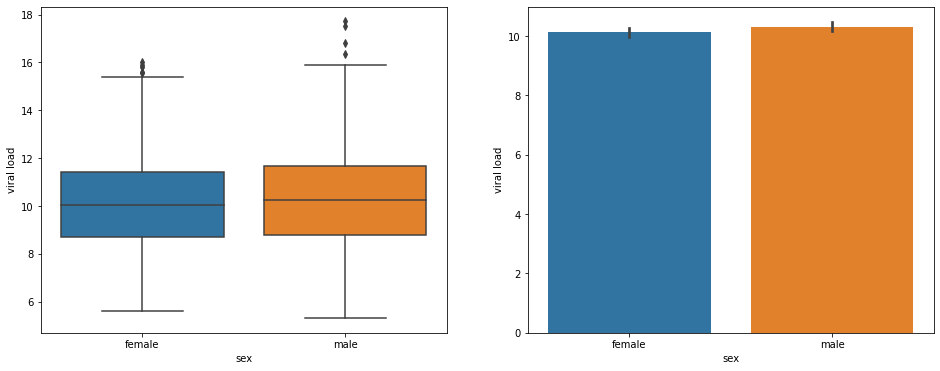

In [37]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(data=clean_data,x='sex',y='viral load')
plt.subplot(1,2,2)
sns.barplot(data=clean_data,x='sex',y='viral load')

**2.Hypothesis formulation:**

H0: Mean of viral load of females equal to males
H1: Mean of viral load of females is different to males

**3.Checking Test Assumptions:**

checking sample means follow normal distribution

In [38]:
apollo_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [39]:
#Taking random sample means
males=[]
females=[]
for i in range(1000) :
    mean_m= np.mean(apollo_data[apollo_data['sex']=='male']['viral load'].sample(300,replace=True))
    mean_f= np.mean(apollo_data[apollo_data['sex']=='female']['viral load'].sample(300,replace=True))
    males.append(mean_m)
    females.append(mean_f)


<AxesSubplot:ylabel='Count'>

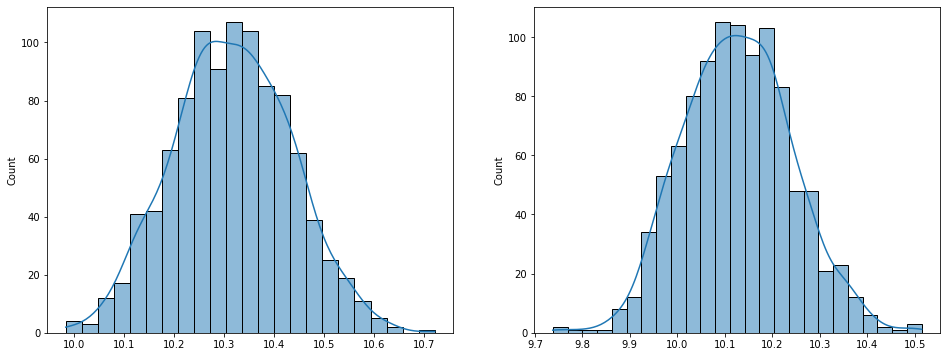

In [40]:
# Distribution plots of sample means
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(data=males,kde=True)
plt.subplot(1,2,2)
sns.histplot(data=females,kde=True)

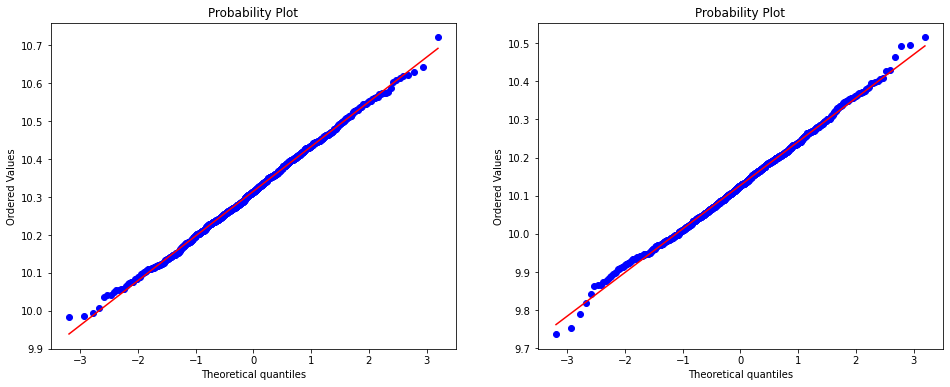

In [41]:
# Checking normality by QQ-plot
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
stats.probplot(males,plot=plt)
plt.subplot(1,2,2)
stats.probplot(females,plot=plt)
plt.show()

- **Almost points are on the line, So they follow Normal Distribution**

In [42]:
# Checking normality distribution by shapiro test
print('Males: ',stats.shapiro(males),'\n',
    'Females: ',stats.shapiro(females))

Males:  ShapiroResult(statistic=0.9985634684562683, pvalue=0.5965774655342102) 
 Females:  ShapiroResult(statistic=0.9978416562080383, pvalue=0.22250770032405853)


- **P value is greater than 0.05 so we should accept null hypothesis i.e, distribution is normal.**

In [43]:
# Checking Homogineity of varience by levene test.
stats.levene(apollo_data[apollo_data['sex']=='male']['viral load'],apollo_data[apollo_data['sex']=='female']['viral load'])

LeveneResult(statistic=0.0038754151966871046, pvalue=0.9503708012456551)

- **P value is very high so we should accept null hypothesis i.e, Variance is equal.**

**4.P-Value:**

In [44]:
stats.ttest_ind(apollo_data[apollo_data['sex']=='male']['viral load'],
                apollo_data[apollo_data['sex']=='female']['viral load'],equal_var=True)

Ttest_indResult(statistic=1.695711164450323, pvalue=0.0901735841670204)

**5.Conclusion based on P-Value:**

- **P-value is greater than 0.05 so we should accept null hypothesis i.e, means of viral load is equal for males and females.**

**C. Chi-square: Is the proportion of smoking significantly different across different regions**

**1.Visual Analysis:**

<AxesSubplot:xlabel='region', ylabel='count'>

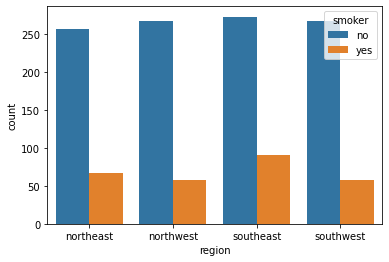

In [45]:
sns.countplot(data=clean_data,x='region',hue='smoker')

In [46]:
pd.crosstab(clean_data['region'],clean_data['smoker'])

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


**2.Hypothesis formulation:**

H0: proportion of smokers doesn't depend on region.
H1: proportion of smokers depend on region.

**3.Checking Test Assumptions:**

- The two samples are independent
- No expected cell count is = 0
- No more than 20% of the cells have and expected cell count < 5

**4.P-Value:**

In [47]:
stats.chi2_contingency(pd.crosstab(clean_data['region'],clean_data['smoker']))

(7.343477761407071,
 0.06171954839170541,
 3,
 array([[257.65022422,  66.34977578],
        [258.44544096,  66.55455904],
        [289.45889387,  74.54110613],
        [258.44544096,  66.55455904]]))

- **P-value=  0.06171**
- **Test statistic= 7.3434**
- **DOF= 3**

**5.Conclusion based on P-Value:**

- **P-Value is greater than 0.05 so we should accept null hypothesis i.e, Proportion of smokers doesn't depend on region.**
- **So every region the smokers proportion is equal**

**D. One way Anova: Mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same**

**1.Visual Analysis:**

<AxesSubplot:xlabel='severity level', ylabel='viral load'>

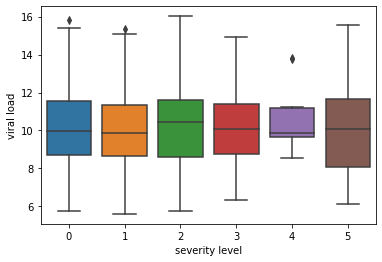

In [48]:
sns.boxplot(data=clean_data[clean_data['sex']=='female'],x='severity level',y='viral load')

<AxesSubplot:xlabel='severity level', ylabel='viral load'>

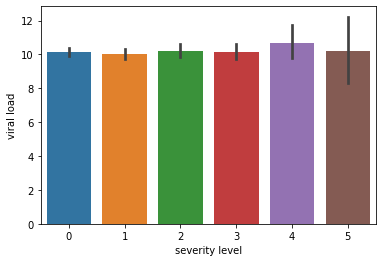

In [49]:
sns.barplot(data=clean_data[clean_data['sex']=='female'],x='severity level',y='viral load')

In [50]:
# Value counts of different severity levels
clean_data[clean_data['sex']=='female']['severity level'].value_counts()

0    289
1    158
2    119
3     77
4     11
5      8
Name: severity level, dtype: int64

**2.Hypothesis formulation:**

H0: Means of viral load are equal with 0,1,2 severity level.
H1: Means of viral load are not equal with 0,1,2 severity level.

**3.Checking Test Assumptions:**

In [51]:
#Taking random sample means
severity_0=apollo_data[(apollo_data['sex']=='female')&(apollo_data['severity level']==0)].sample(119)
severity_1=apollo_data[(apollo_data['sex']=='female')&(apollo_data['severity level']==1)].sample(119)
severity_2=apollo_data[(apollo_data['sex']=='female')&(apollo_data['severity level']==2)]
sl0=[]
sl1=[]
sl2=[]
for i in range(1000) :
    mean_0= np.mean(severity_0['viral load'].sample(60))
    mean_1= np.mean(severity_1['viral load'].sample(60))
    mean_2= np.mean(severity_2['viral load'].sample(60))
    sl0.append(mean_0)
    sl1.append(mean_1)
    sl2.append(mean_2)


<AxesSubplot:ylabel='Count'>

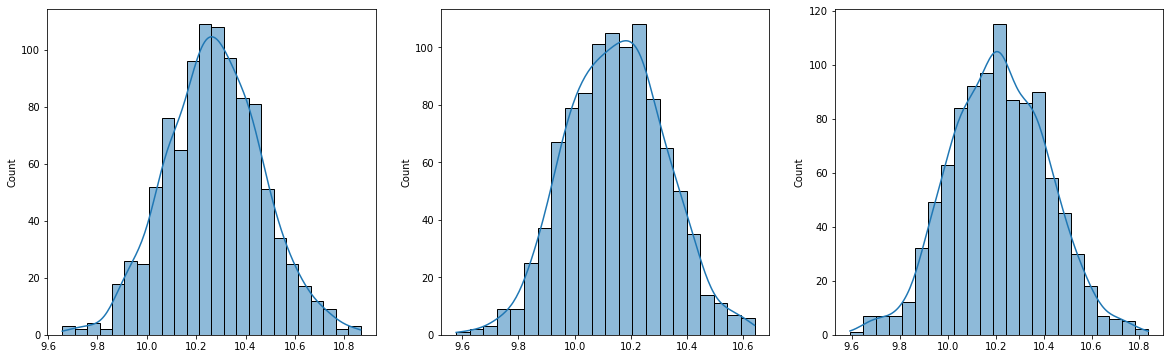

In [52]:
# PLotting distribution of sample means
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.histplot(data=sl0,kde=True)
plt.subplot(1,3,2)
sns.histplot(data=sl1,kde=True)
plt.subplot(1,3,3)
sns.histplot(data=sl2,kde=True)

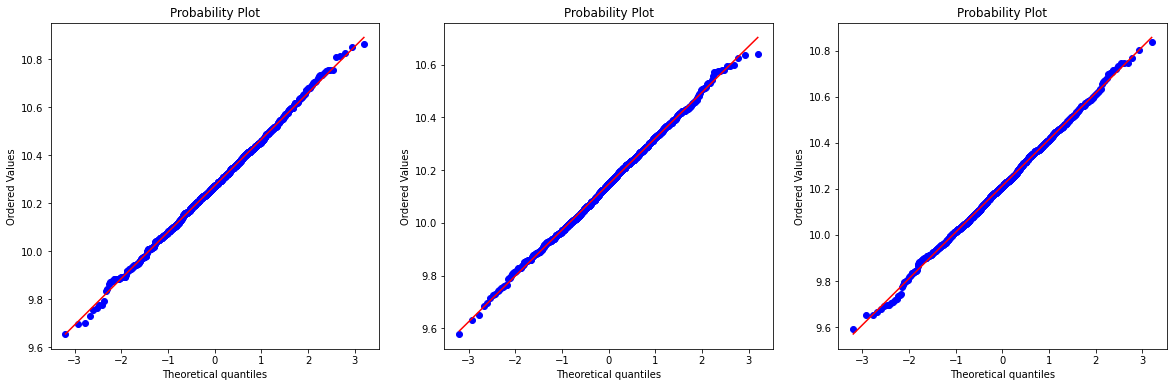

In [53]:
# QQ-plots of sample means to check normality
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
stats.probplot(sl0,plot=plt)
plt.subplot(1,3,2)
stats.probplot(sl1,plot=plt)
plt.subplot(1,3,3)
stats.probplot(sl2,plot=plt)
plt.show()

- **Almost points are on the line, So they follow Normal Distribution**

In [54]:
print('severity level 0: ',stats.shapiro(sl0))
print('severity level 1: ',stats.shapiro(sl1))
print('severity level 2: ',stats.shapiro(sl2))

severity level 0:  ShapiroResult(statistic=0.9989008903503418, pvalue=0.8179137110710144)
severity level 1:  ShapiroResult(statistic=0.9986072182655334, pvalue=0.6258923411369324)
severity level 2:  ShapiroResult(statistic=0.998630166053772, pvalue=0.6413745880126953)


- **P-value is greater than 0.05 in three cases so all are following normal distribution**

In [55]:
print('Homogeneity of variance between severity 0 and 1: ',stats.levene(severity_0['viral load'],severity_1['viral load']))
print('Homogeneity of variance between severity 0 and 2: ',stats.levene(severity_0['viral load'],severity_2['viral load']))
print('Homogeneity of variance between severity 2 and 1: ',stats.levene(severity_2['viral load'],severity_1['viral load']))

Homogeneity of variance between severity 0 and 1:  LeveneResult(statistic=2.565474251414616, pvalue=0.11055743893407298)
Homogeneity of variance between severity 0 and 2:  LeveneResult(statistic=0.026869777282685164, pvalue=0.8699343921469765)
Homogeneity of variance between severity 2 and 1:  LeveneResult(statistic=1.8886911487426599, pvalue=0.17065329243675015)


- **P value is very high so we should accept null hypothesis i.e, Variance is equal.**

**4.P-Value:**

In [56]:
stats.f_oneway(severity_0['viral load'],severity_1['viral load'],severity_2['viral load'])

F_onewayResult(statistic=0.14610799502134478, pvalue=0.8641164627747497)

**5.Conclusion based on P-Value:**

- **P-Value is greater than 0.05 so we should accept null hypothesis i.e, means are equal.**
- **So the means of viral load of females with severity level 0,1 and 2 are equal.**

### **Business Insights**

- Hospitalization charges is increasing for older patients.
- viral load is somewhat high for old age people compared to others.
- For Adults and middle age adults the severity level with 0 people is low compared to other age groups and the other severity levels are high compared to other age groups.
- viral load is high in southeast compared to other region.
- As viral load increasing the hospitalization charges are increasing for some patients who are smokers.
- Almost half of severity level 5 cases came from southwest


### **Recommendations**

- Age is a significant variable in predicting hospitalization charges. As the age is getting higher the hospitalization charges are more.
- Sex feature is not making any significant change in hospitalization charges
- viral load is most significant variable in predicting hospitalization charges only for smokers.For non smokers it is not much significant.
- severity level is also not showing much effective in hospitalization charges. For Non-smokers there is a slight increase in charges.
- Smoker variable is very significant variable for predicting hospitalization charges. Smokers hospitalization charges are much higher than non smoker.
- Region is not much effective in predicting hospitalization charges. But in southeast region the hospitalization charges are somewhat high.

#### **Function for checking T-test Assumptions**

In [57]:
## Assumptions_t_test(data, categorical_column on what different means ,continuous_variable mean value)
def Assumptions_t_test(data,x,y):
    means=[[],[]]
    #Taking random sample means
    for i in range(1000):
        m_0 = np.mean(data[data[x]==data[x].unique()[0]][y].sample(len(data[data[x]==data[x].unique()[0]])//2,replace=True))
        m_1 = np.mean(data[data[x]==data[x].unique()[1]][y].sample(len(data[data[x]==data[x].unique()[1]])//2,replace=True))
        means[0].append(m_0)
        means[1].append(m_1)

    # Distribution of sample means 
    print('Distribution of sample means')
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    sns.histplot(data=means[0],kde=True)
    plt.subplot(1,2,2)
    sns.histplot(data=means[1],kde=True)
    plt.show()

    # Checking normality by QQ-plot of sample means.
    print('Checking normality by QQ-plot of sample means')
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    stats.probplot(means[0],plot=plt)
    plt.subplot(1,2,2)
    stats.probplot(means[1],plot=plt)
    plt.show()

    # Checking Normal distribution by Shapiro test
    print('Checking Normal distribution by Shapiro test')
    print(data[x].unique()[0],' ',stats.shapiro(means[0]),'\n',
       data[x].unique()[1],' ',stats.shapiro(means[1]))

    # Homogeneity of variance by levene test
    print('Homogeneity of variance by levene test')
    print(stats.levene(data[data[x]==data[x].unique()[0]][y],data[data[x]==data[x].unique()[1]][y]))
    

Distribution of sample means


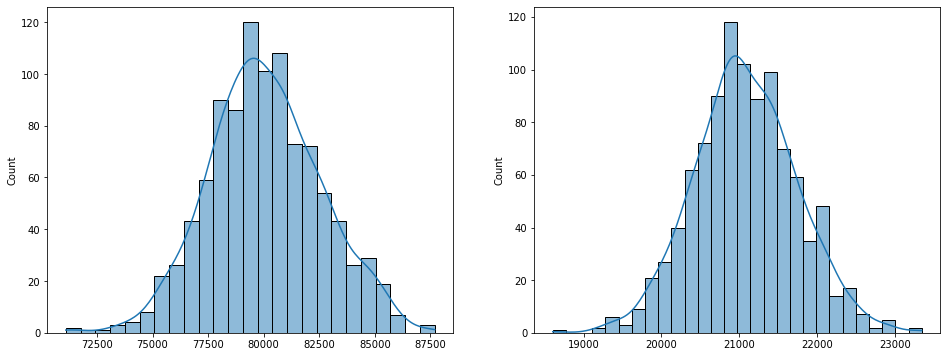

Checking normality by QQ-plot of sample means


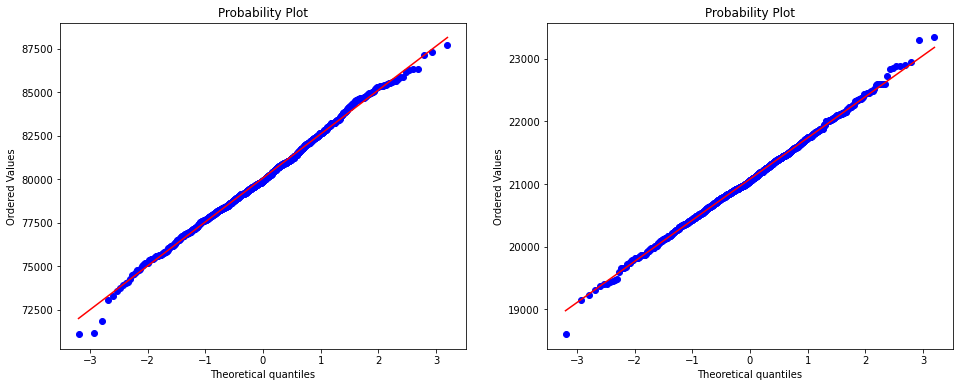

Checking Normal distribution by Shapiro test
yes   ShapiroResult(statistic=0.9970239400863647, pvalue=0.05946512892842293) 
 no   ShapiroResult(statistic=0.9986742734909058, pvalue=0.6712003946304321)
Homogeneity of variance by levene test
LeveneResult(statistic=332.6132009308764, pvalue=1.5595259401311176e-66)


In [58]:
Assumptions_t_test(apollo_data,'smoker','hospitalization charges')

#### **Function for checking Annova test Assumptions**

In [66]:
## Assumptions_anova_test(data, categorical_column on what different means ,continuous_variable mean value)
def Assumptions_anova_test(data,x,y):
    means=[]
    for i in range(data[x].nunique()):
        means.append([])
    #Taking random sample means
    for i in range(1000):
        for i in range(data[x].nunique()):
            m_0 = np.mean(data[data[x]==data[x].unique()[i]][y].sample(len(data[data[x]==data[x].unique()[i]])//2,replace=True))
            means[i].append(m_0)
        

    # Distribution of sample means 
    print('Distribution of sample means')
    plt.figure(figsize=(16,6))

    for i in range(data[x].nunique()):
        plt.subplot(1,data[x].nunique(),i+1)
        sns.histplot(data=means[i],kde=True)
    plt.show()

    # Checking normality by QQ-plot of sample means.
    print('Checking normality by QQ-plot of sample means')
    plt.figure(figsize=(16,6))
    for i in range(data[x].nunique()):
        plt.subplot(1,data[x].nunique(),i+1)
        stats.probplot(means[i],plot=plt)
    plt.show()

    # Checking Normal distribution by Shapiro test
    print('Checking Normal distribution by Shapiro test')
    for i in range(data[x].nunique()):
        print(data[x].unique()[i],' ',stats.shapiro(means[i]))

    # Homogeneity of variance by levene test
    print('Homogeneity of variance by levene test')
    arr=list(combinations(np.linspace(0,data[x].nunique()-1,data[x].nunique()),2))
    for i in arr:
        print('Homogeneity of varience of ',data[x].unique()[int(i[0])],'and',
            data[x].unique()[int(i[1])],stats.levene(data[data[x]==data[x].unique()[int(i[0])]][y],
            data[data[x]==data[x].unique()[int(i[1])]][y]))
    

Distribution of sample means


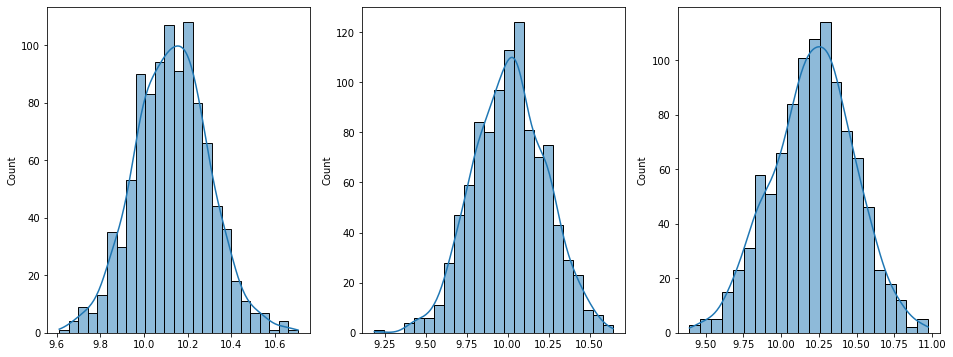

Checking normality by QQ-plot of sample means


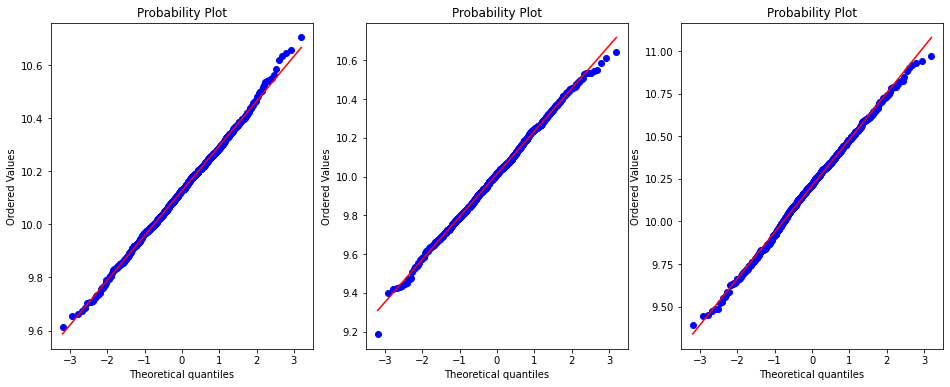

Checking Normal distribution by Shapiro test
0   ShapiroResult(statistic=0.998698890209198, pvalue=0.6878018975257874)
1   ShapiroResult(statistic=0.9986320734024048, pvalue=0.6426673531532288)
2   ShapiroResult(statistic=0.9974783062934875, pvalue=0.1252690553665161)
Homogeneity of variance by levene test
Homogeneity of varience of  0 and 1 LeveneResult(statistic=0.31986815484052017, pvalue=0.5719719369091907)
Homogeneity of varience of  0 and 2 LeveneResult(statistic=1.0059689028000818, pvalue=0.31646789719156576)
Homogeneity of varience of  1 and 2 LeveneResult(statistic=1.7297899605624114, pvalue=0.18953329924059983)


In [67]:
Assumptions_anova_test(clean_data[(clean_data['sex']=='female')&
                                  ((clean_data['severity level']==0) | (clean_data['severity level']==1) | 
                                   (clean_data['severity level']==2))],'severity level','viral load')